# clustering of distinct commercial centers using POI data of New Delhi

#importing the required libraries

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn import cluster
from sklearn.preprocessing import scale
sns.set(style="whitegrid")

#Loading the data

In [5]:
df=gpd.read_file('data.geojson')

In [7]:
df.head()

,id,@id,amenity,building,type,addr:postcode,addr:street,name,name:hi,phone,...,drink:wine,dance:teaching,theatre:type,addr:sector,waste,drink:shake,seats,addr:subdistrict,contact:phone,geometry
0,relation/5231661,relation/5231661,restaurant,yes,multipolygon,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((77.19960 28.60221, 77.19960 28.60212..."
1,relation/5247847,relation/5247847,courthouse,yes,multipolygon,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((77.23391 28.61606, 77.23344 28.61535..."
2,relation/5251171,relation/5251171,post_office,yes,multipolygon,110001,Sansad Marg,Postal Directorate,डाक निदेशालय,+91 11 2303 6356,...,None,None,None,None,None,None,None,None,None,"POLYGON ((77.21243 28.62242, 77.21304 28.62207..."
3,relation/5492712,relation/5492712,place_of_worship,yes,multipolygon,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((77.23927 28.60768, 77.23927 28.60730..."
4,relation/5492821,relation/5492821,courthouse,yes,multipolygon,None,None,Supreme Court,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((77.24011 28.62287, 77.24011 28.62302..."


#plotting the geometry of obtained POI data of New Delhi

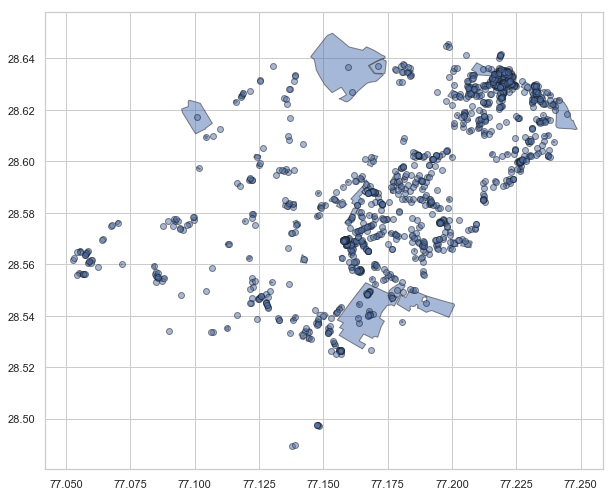

In [4]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

# Preprocessing the data

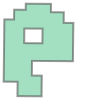

In [9]:
df['geometry'][0]

In [10]:
df['amenity'].unique()

array(['restaurant', 'courthouse', 'post_office', 'place_of_worship',
       'university', 'school', 'parking', 'fairground', 'hospital',
       'kindergarten', 'college', 'bus_station', 'fast_food',
       'marketplace', 'police', 'community_centre', 'prison', 'fountain',
       'embassy', 'public_building', 'library', 'swimming_pool',
       'toilets', 'cafe', 'arts_centre', 'theatre', 'fuel', 'planetarium',
       'fire_station', 'shelter', 'bank', 'music_school;dancing_school',
       'meditation_centre', 'social_facility', 'events_venue',
       'music_school', 'cinema', 'pharmacy', 'post_box', 'atm', 'club',
       'Netaji Nagar Market', 'Suvidha Market, Netaji Nagar',
       'Ayurvedic Hospital', 'House', 'bar', 'taxi', 'waste_basket',
       'bench', 'doctors', 'bureau_de_change', 'pub', 'fast_food;bar',
       'car_wash', 'food_court', 'veterinary', 'training',
       'drinking_water', 'bicycle_parking', 'bicycle_rental',
       'vending_machine', 'money_transfer', 'car_rental

In [11]:
df1=df['amenity']

In [12]:
df1

0             restaurant
1             courthouse
2            post_office
3       place_of_worship
4             courthouse
              ...       
1483            fountain
1484           fast_food
1485                cafe
1486             toilets
1487                bank
Name: amenity, Length: 1488, dtype: object

In [13]:
df2=pd.DataFrame(df1)

In [14]:
df2.head()

,amenity
0,restaurant
1,courthouse
2,post_office
3,place_of_worship
4,courthouse


In [15]:
df2.shape

(1488, 1)

In [16]:
df2['amenity'].value_counts()

school                 158
toilets                130
parking                115
restaurant             111
atm                     98
                      ... 
Netaji Nagar Market      1
House                    1
money_transfer           1
dentist                  1
telephone                1
Name: amenity, Length: 73, dtype: int64

In [17]:
df_dummy=pd.get_dummies(df2)

In [84]:
df_dummy

,amenity_Ayurvedic Hospital,amenity_House,amenity_Netaji Nagar Market,"amenity_Suvidha Market, Netaji Nagar",amenity_arts_centre,amenity_atm,amenity_bank,amenity_bar,amenity_bench,amenity_bicycle_parking,...,amenity_telephone,amenity_theatre,amenity_toilets,amenity_training,amenity_university,amenity_vending_machine,amenity_veterinary,amenity_waste_basket,amenity_waste_disposal,clusters
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1486,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Building the clustering model(KMode clustering)

In [19]:
from kmodes import kmodes

In [20]:
x = df_dummy.reset_index().values

In [21]:
import random
km = kmodes.KModes(n_clusters=10, init='Huang', n_init=5, verbose=0,random_state=123)
clusters = km.fit_predict(x)
df_dummy['clusters'] = clusters

In [79]:
# get an array of cluster modes
kmodes = km.cluster_centroids_

In [83]:
#kmodes

In [22]:
df_dummy.shape

(1488, 74)

In [23]:
#concatenate df2 and df_dummy

In [23]:
df_concat=pd.concat([df2,df_dummy],axis=1)

In [25]:
df_concat.head()

,amenity,amenity_Ayurvedic Hospital,amenity_House,amenity_Netaji Nagar Market,"amenity_Suvidha Market, Netaji Nagar",amenity_arts_centre,amenity_atm,amenity_bank,amenity_bar,amenity_bench,...,amenity_telephone,amenity_theatre,amenity_toilets,amenity_training,amenity_university,amenity_vending_machine,amenity_veterinary,amenity_waste_basket,amenity_waste_disposal,clusters
0,restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,courthouse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,post_office,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,place_of_worship,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,courthouse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_concat.shape

(1488, 75)

In [27]:
clustered_view=df_concat.groupby('clusters')

In [30]:
cv=clustered_view[['amenity','clusters']]

In [31]:
cv.head()

,amenity,clusters
0,restaurant,7
1,courthouse,0
2,post_office,0
3,place_of_worship,0
4,courthouse,0
5,university,0
6,school,4
7,parking,2
11,school,4
12,school,4


#logical clustering post statistical method- statistical method gave very good result 
#however further clustering can be done logically to minimize the number of clusters

In [32]:
df_concat['geometry']=df['geometry']

In [33]:
df_concat.head()

,amenity,amenity_Ayurvedic Hospital,amenity_House,amenity_Netaji Nagar Market,"amenity_Suvidha Market, Netaji Nagar",amenity_arts_centre,amenity_atm,amenity_bank,amenity_bar,amenity_bench,...,amenity_theatre,amenity_toilets,amenity_training,amenity_university,amenity_vending_machine,amenity_veterinary,amenity_waste_basket,amenity_waste_disposal,clusters,geometry
0,restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,"POLYGON ((77.19960 28.60221, 77.19960 28.60212..."
1,courthouse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((77.23391 28.61606, 77.23344 28.61535..."
2,post_office,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((77.21243 28.62242, 77.21304 28.62207..."
3,place_of_worship,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((77.23927 28.60768, 77.23927 28.60730..."
4,courthouse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((77.24011 28.62287, 77.24011 28.62302..."


In [34]:
df_final=df_concat[['amenity','clusters','geometry']]

In [35]:
df_final

,amenity,clusters,geometry
0,restaurant,7,"POLYGON ((77.19960 28.60221, 77.19960 28.60212..."
1,courthouse,0,"POLYGON ((77.23391 28.61606, 77.23344 28.61535..."
2,post_office,0,"POLYGON ((77.21243 28.62242, 77.21304 28.62207..."
3,place_of_worship,0,"POLYGON ((77.23927 28.60768, 77.23927 28.60730..."
4,courthouse,0,"POLYGON ((77.24011 28.62287, 77.24011 28.62302..."
...,...,...,...
1483,fountain,0,POINT (77.23111 28.61253)
1484,fast_food,9,POINT (77.21877 28.62889)
1485,cafe,6,POINT (77.21867 28.62889)
1486,toilets,0,POINT (77.21896 28.63579)


In [36]:
#df_final.groupby('clusters').head(100)

In [37]:
df_final['clusters']=df_final['clusters'].replace(to_replace=[6,7,9],value='Sustenance')#Sustenance

C:\Users\NANINE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_final['clusters']=df_final['clusters'].replace(to_replace=[5],value='Financial')#FINANCIAL

C:\Users\NANINE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_final['clusters']=df_final['clusters'].replace(to_replace=[4],value='Education')#EDUCATION

C:\Users\NANINE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_final['clusters']=df_final['clusters'].replace(to_replace=[2,3,8],value='Transportation')#TRANSPORTATION

C:\Users\NANINE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
df_final['clusters']=df_final['clusters'].replace(to_replace=[1],value='Entertainment')#ENTERTAINMENT

C:\Users\NANINE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_final['clusters']=df_final['clusters'].replace(to_replace=[0],value='Others')#OTHERS

C:\Users\NANINE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
df_final.head(100)

,amenity,clusters,geometry
0,restaurant,Sustenance,"POLYGON ((77.19960 28.60221, 77.19960 28.60212..."
1,courthouse,Others,"POLYGON ((77.23391 28.61606, 77.23344 28.61535..."
2,post_office,Others,"POLYGON ((77.21243 28.62242, 77.21304 28.62207..."
3,place_of_worship,Others,"POLYGON ((77.23927 28.60768, 77.23927 28.60730..."
4,courthouse,Others,"POLYGON ((77.24011 28.62287, 77.24011 28.62302..."
...,...,...,...
95,school,Education,"POLYGON ((77.20637 28.62832, 77.20641 28.62905..."
96,school,Education,"POLYGON ((77.05558 28.56442, 77.05644 28.56546..."
97,school,Education,"POLYGON ((77.05999 28.56152, 77.06013 28.56169..."
98,school,Education,"POLYGON ((77.05663 28.56369, 77.05731 28.56325..."


# Visualisation

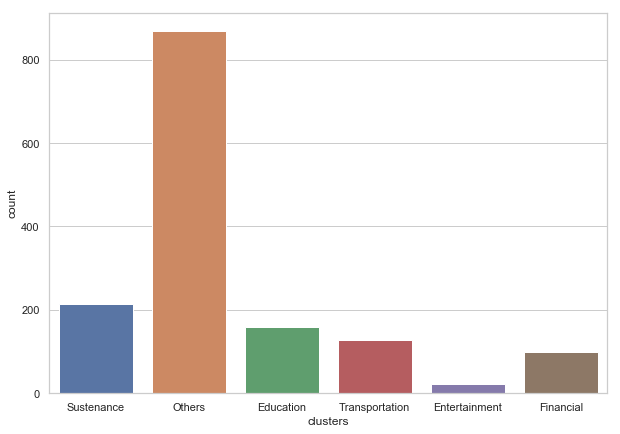

In [44]:
plt.subplots(1, figsize=(10,7))
sns.countplot(x='clusters',data=df_final)

In [45]:
import geopandas
df_final = geopandas.GeoDataFrame(df_final, geometry='geometry')

In [46]:
df_final.head()

,amenity,clusters,geometry
0,restaurant,Sustenance,"POLYGON ((77.19960 28.60221, 77.19960 28.60212..."
1,courthouse,Others,"POLYGON ((77.23391 28.61606, 77.23344 28.61535..."
2,post_office,Others,"POLYGON ((77.21243 28.62242, 77.21304 28.62207..."
3,place_of_worship,Others,"POLYGON ((77.23927 28.60768, 77.23927 28.60730..."
4,courthouse,Others,"POLYGON ((77.24011 28.62287, 77.24011 28.62302..."


In [47]:
import fiona
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [49]:
#df_final.to_file('MyGeometries.shp', driver='ESRI Shapefile')

In [50]:
df_plot = gpd.GeoDataFrame(df_final)

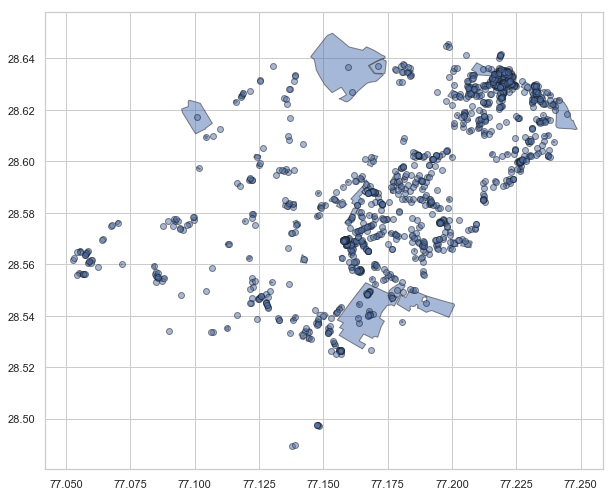

In [51]:
ax = df_plot.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [49]:
#pip install pyshp

In [54]:
import shapefile as shp

In [55]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [56]:
sf = shp.Reader('dataShapeFile.shp')

In [57]:
len(sf.shapes())

275

In [59]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [60]:
df = read_shapefile(sf)
df.shape

(275, 159)

#plotting a specific file for visualisation

In [62]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [64]:
df[df.amenity == 'hospital'].head()

,id,@id,amenity,building,type,addr_postc,addr_stree,name,name_hi,phone,...,drink_wine,dance_teac,theatre_ty,addr_secto,waste,drink_shak,seats,addr_subdi,contact_ph,coords
10,way/34404757,way/34404757,hospital,,,,,Ram Manohar Lohia Hospital,,,...,,,,,,,,,,"[(77.2003585, 28.6243399), (77.1997823, 28.624..."
17,way/44263455,way/44263455,hospital,,,110001,Shaheed Baghat Singh Marg,Lady Hardinge Medical College and Hospital,श्रीमती सुचेता कृपलानी अस्पताल,,...,,,,,,,,,,"[(77.2115237, 28.6372684), (77.216661, 28.6343..."
53,way/190333646,way/190333646,hospital,,,,,Indian Spinal Injuries Centre,,,...,,,,,,,,,,"[(77.14344, 28.5323575), (77.1428383, 28.53256..."
75,way/262439881,way/262439881,hospital,,,,,Primus Super Speciality Hospital,,,...,,,,,,,,,,"[(77.1805374, 28.5930335), (77.1808646, 28.593..."
167,way/350511222,way/350511222,hospital,,,,,,,,...,,,,,,,,,,"[(77.1526261, 28.5342115), (77.1525177, 28.534..."


In [65]:
df.amenity

0            restaurant
1            courthouse
2           post_office
3      place_of_worship
4            courthouse
             ...       
270             parking
271          courthouse
272          courthouse
273          courthouse
274          courthouse
Name: amenity, Length: 275, dtype: object

C:\Users\NANINE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


(77.2010261090909, 28.6252552)

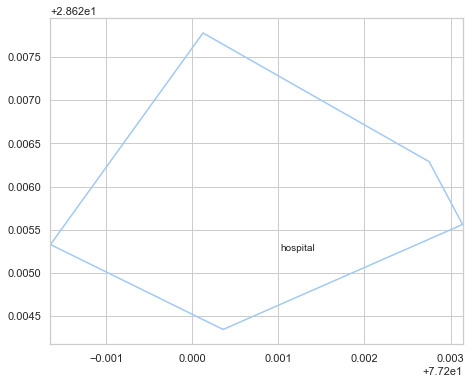

In [66]:
name = 'hospital'
com_id = df[df.amenity == name].index.get_values()[0]
plot_shape(com_id, name)

C:\Users\NANINE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


(77.16774745555556, 28.541961077777778)

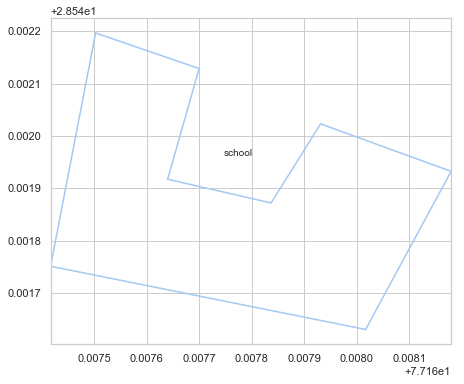

In [67]:
name = 'school'
com_id = df[df.amenity == name].index.get_values()[0]
plot_shape(com_id, name)

C:\Users\NANINE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


(77.16200191914893, 28.63451091489362)

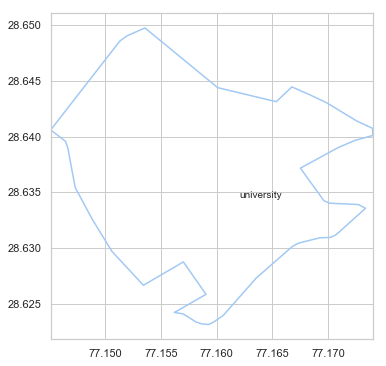

In [68]:
name = 'university'
com_id = df[df.amenity == name].index.get_values()[0]
plot_shape(com_id, name)

C:\Users\NANINE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


(77.16790252000001, 28.54963976)

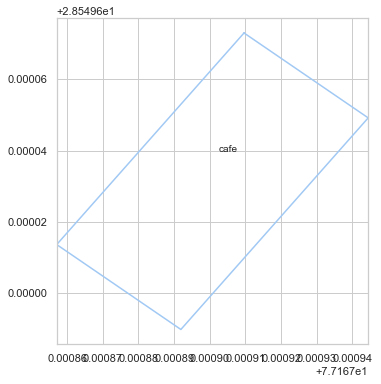

In [69]:
name = 'cafe'
com_id = df[df.amenity == name].index.get_values()[0]
plot_shape(com_id, name)

C:\Users\NANINE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


(77.1221216, 28.5793892)

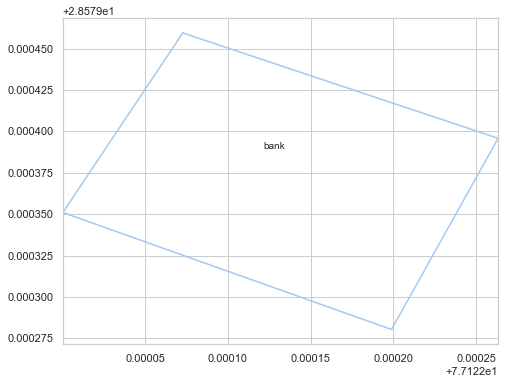

In [70]:
name = 'bank'
com_id = df[df.amenity == name].index.get_values()[0]
plot_shape(com_id, name)

C:\Users\NANINE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


(77.19978806249999, 28.601934583333335)

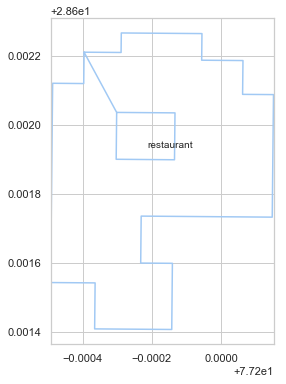

In [71]:
name = 'restaurant'
com_id = df[df.amenity == name].index.get_values()[0]
plot_shape(com_id, name)

C:\Users\NANINE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


(77.16647087, 28.5487462)

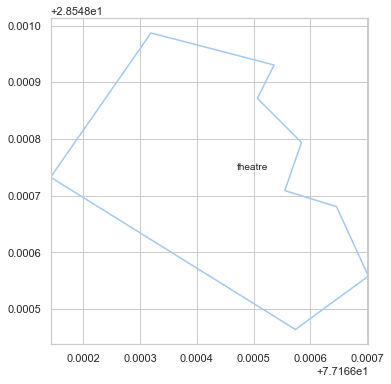

In [72]:
name = 'theatre'
com_id = df[df.amenity == name].index.get_values()[0]
plot_shape(com_id, name)

C:\Users\NANINE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


(77.21417146, 28.617335739999998)

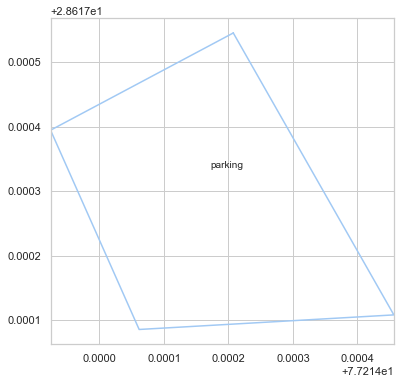

In [73]:
name = 'parking'
com_id = df[df.amenity == name].index.get_values()[0]
plot_shape(com_id, name)

C:\Users\NANINE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


(77.21302747826087, 28.622512943478263)

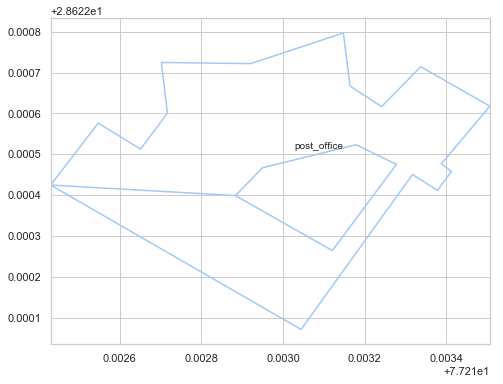

In [74]:
name = 'post_office'
com_id = df[df.amenity == name].index.get_values()[0]
plot_shape(com_id, name)

C:\Users\NANINE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


(77.23000674444444, 28.602161166666665)

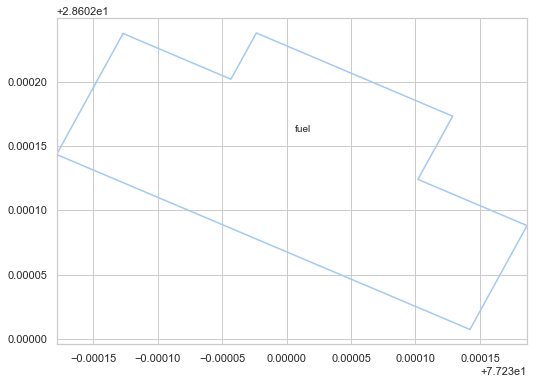

In [75]:
name = 'fuel'
com_id = df[df.amenity == name].index.get_values()[0]
plot_shape(com_id, name)

In [77]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

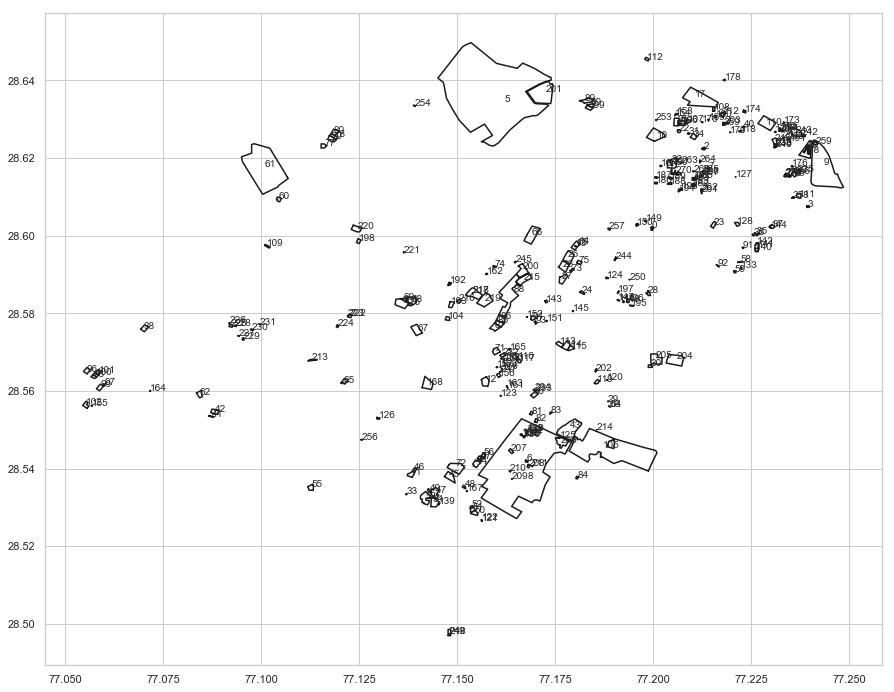

In [78]:
plot_map(sf,figsize=(15,12))

#further visualisation of clustering of commercial centre is done in Tableau